In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nycAccidents_df = pd.read_csv('NYC_Collisions.csv')
nycAccidents_df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [3]:
nycAccidents_df.columns = [i.lower().replace(' ', '_') for i in nycAccidents_df.columns]
nycAccidents_df.columns

Index(['collision_id', 'date', 'time', 'borough', 'street_name',
       'cross_street', 'latitude', 'longitude', 'contributing_factor',
       'vehicle_type', 'persons_injured', 'persons_killed',
       'pedestrians_injured', 'pedestrians_killed', 'cyclists_injured',
       'cyclists_killed', 'motorists_injured', 'motorists_killed'],
      dtype='object')

In [4]:
nycAccidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   collision_id         238421 non-null  int64  
 1   date                 238421 non-null  object 
 2   time                 238421 non-null  object 
 3   borough              231224 non-null  object 
 4   street_name          238058 non-null  object 
 5   cross_street         111291 non-null  object 
 6   latitude             216098 non-null  float64
 7   longitude            216098 non-null  float64
 8   contributing_factor  237134 non-null  object 
 9   vehicle_type         238421 non-null  object 
 10  persons_injured      238420 non-null  float64
 11  persons_killed       238421 non-null  int64  
 12  pedestrians_injured  238421 non-null  int64  
 13  pedestrians_killed   238421 non-null  int64  
 14  cyclists_injured     238421 non-null  int64  
 15  cyclists_killed  

In [5]:
# Combine Date and Time columns and convert to datetime
nycAccidents_df['datetime'] = pd.to_datetime(nycAccidents_df['date'] + ' ' + nycAccidents_df['time'])

# If you want to drop the original Date and Time columns
nycAccidents_df.drop(['date', 'time'], axis=1, inplace = True)

In [6]:
nycAccidents_df.isna().sum()

collision_id                0
borough                  7197
street_name               363
cross_street           127130
latitude                22323
longitude               22323
contributing_factor      1287
vehicle_type                0
persons_injured             1
persons_killed              0
pedestrians_injured         0
pedestrians_killed          0
cyclists_injured            0
cyclists_killed             0
motorists_injured           0
motorists_killed            0
datetime                    0
dtype: int64

#### <center> Section - A [Identify seasonal patterns] </center>
Your first objective is to calculate the number of collisions by month and year, and visualize them using line charts. <br>
**Tasks**:
1. Calculate the count of 'Collision ID' by year and month, and visualize it using a line chart.
2. Filter out the incomplete month of April 2023.
3. Modify the line chart so that each year is shown as a separate line.
4. Apply formatting to finalize the chart and summarize insights from the analysis.

In [7]:
seasonal_df = nycAccidents_df
seasonal_df['year'] = seasonal_df['datetime'].dt.year
seasonal_df['month'] = seasonal_df['datetime'].dt.month_name()
seasonal_df.head()

,collision_id,borough,street_name,cross_street,latitude,longitude,contributing_factor,vehicle_type,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclists_injured,cyclists_killed,motorists_injured,motorists_killed,datetime,year,month
0,4491746,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,2021-01-01 20:00:00,2021,January
1,4441905,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,2021-01-01 05:28:00,2021,January
2,4382769,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,2021-01-01 06:00:00,2021,January
3,4380949,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0,2021-01-01 19:30:00,2021,January
4,4380940,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,2021-01-01 07:40:00,2021,January


In [8]:
season_counts = seasonal_df.groupby(['year', 'month'])['collision_id'].count()
season_counts

year  month    
2021  April         8752
      August        9880
      December      8583
      February      6976
      January       7719
      July         10002
      June         10608
      March         8262
      May          10289
      November      9375
      October      10204
      September     9896
2022  April         8545
      August        8921
      December      8365
      February      7390
      January       7915
      July          8870
      June          9471
      March         8856
      May           9460
      November      8168
      October       8944
      September     8875
2023  April         1883
      February      6841
      January       7390
      March         7981
Name: collision_id, dtype: int64

<Axes: xlabel='year,month'>

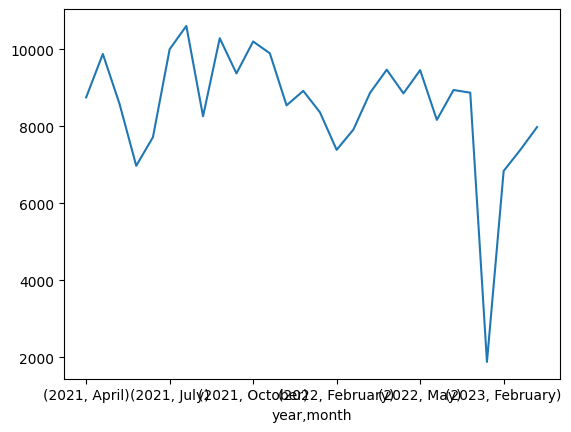

In [9]:
season_counts.plot(kind='line')

In [10]:
seasonal_df = seasonal_df[seasonal_df['datetime'].dt.strftime('%Y-%m') != '2023-04']
season_counts = seasonal_df.groupby(['year', 'month'])['collision_id'].count()
season_counts

year  month    
2021  April         8752
      August        9880
      December      8583
      February      6976
      January       7719
      July         10002
      June         10608
      March         8262
      May          10289
      November      9375
      October      10204
      September     9896
2022  April         8545
      August        8921
      December      8365
      February      7390
      January       7915
      July          8870
      June          9471
      March         8856
      May           9460
      November      8168
      October       8944
      September     8875
2023  February      6841
      January       7390
      March         7981
Name: collision_id, dtype: int64

<Axes: xlabel='year,month'>

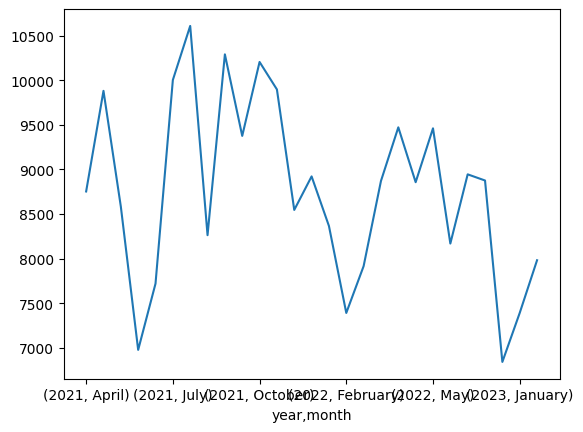

In [11]:
season_counts.plot(kind='line')

<Figure size 1200x600 with 0 Axes>

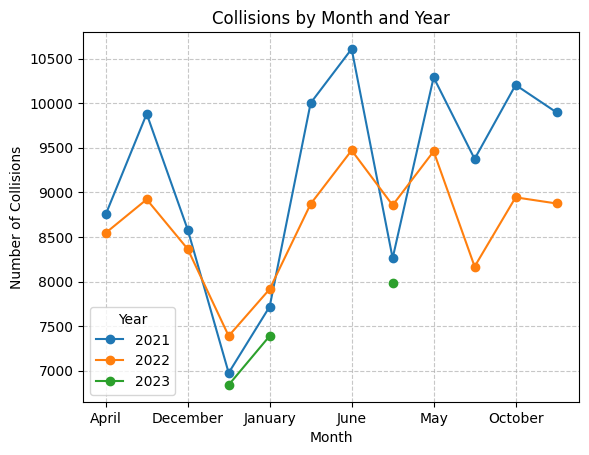

In [12]:
# Pivot the data to create separate columns for each year
season_counts = seasonal_df.groupby(['year', 'month'])['collision_id'].count().unstack(level=0)

# Create the line plot
plt.figure(figsize=(12, 6))
season_counts.plot(marker='o')

# Customize the plot
plt.title('Collisions by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### <center> Section - B [Visualize Weekly Trends] </center>
Your second objective is to calculate the number of collisions by time of day and day of week, and visualize the data using a heatmap. <br>
**Tasks**:
1. Extract the Weekday and Hour from the 'Date' and 'Time' columns.
2. Calculate the count of 'Collision ID' by Weekday and Hour.
3. Create a heatmap to visualize collision hotspots by time of day and day of week.
4. Modify the heatmap to a "white-white-red" 3-color scale to keep focus on the most dangerous periods in the week and summarize the insights from your analysis.

In [13]:
weekly_df = nycAccidents_df
weekly_df['weekday'] = weekly_df['datetime'].dt.day_of_week + 1
weekly_df['hour'] = weekly_df['datetime'].dt.hour
weekly_df.head()

,collision_id,borough,street_name,cross_street,latitude,longitude,contributing_factor,vehicle_type,persons_injured,persons_killed,...,pedestrians_killed,cyclists_injured,cyclists_killed,motorists_injured,motorists_killed,datetime,year,month,weekday,hour
0,4491746,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,...,0,0,0,0,0,2021-01-01 20:00:00,2021,January,5,20
1,4441905,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,...,0,0,0,0,0,2021-01-01 05:28:00,2021,January,5,5
2,4382769,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,...,0,0,0,0,0,2021-01-01 06:00:00,2021,January,5,6
3,4380949,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,...,0,0,0,0,0,2021-01-01 19:30:00,2021,January,5,19
4,4380940,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,...,0,0,0,0,0,2021-01-01 07:40:00,2021,January,5,7


In [14]:
weekly_counts = weekly_df.groupby(['weekday', 'hour'])['collision_id'].count()
weekly_counts

weekday  hour
1        0       1495
         1        753
         2        573
         3        465
         4        563
                 ... 
7        19      1507
         20      1412
         21      1395
         22      1296
         23      1179
Name: collision_id, Length: 168, dtype: int64

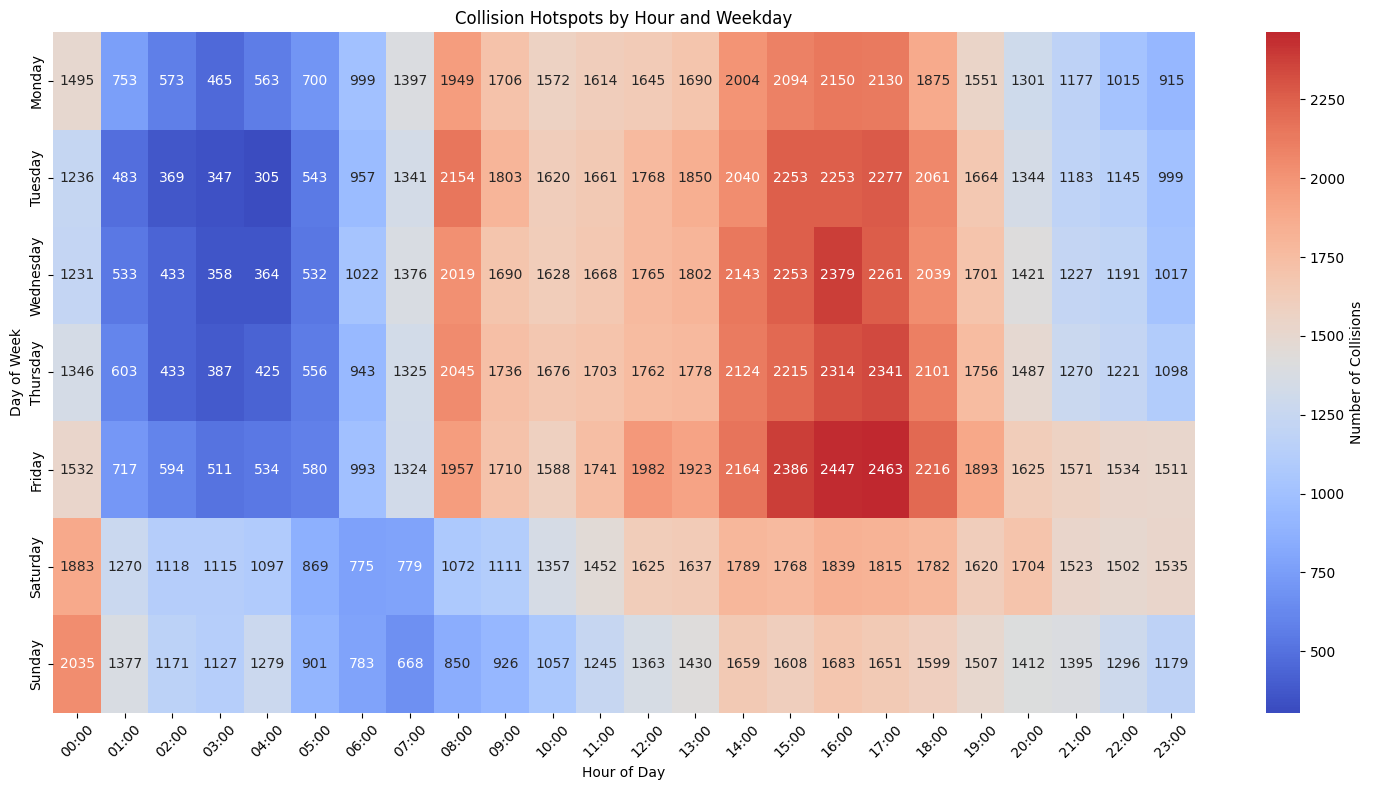

In [15]:
# Get the counts and reshape the data for the heatmap
collision_counts = weekly_df.groupby(['weekday', 'hour'])['collision_id'].count().unstack()

# Create weekday labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create hour labels (24-hour format)
hour_labels = [f'{i:02d}:00' for i in range(24)]

# Create the heatmap with a custom white-white-red color scale
plt.figure(figsize=(15, 8))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Create a white-white-red colormap
sns.heatmap(collision_counts,
            cmap=cmap,
            center=collision_counts.mean().mean(),
            annot=True,
            fmt='g',
            cbar_kws={'label': 'Number of Collisions'},
            yticklabels=weekday_labels,
            xticklabels=hour_labels)

plt.title('Collision Hotspots by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### <center> Section - C [Analyze Contributing Factors] </center>
Your final objective is to find the top 10 contributing factors by number of collisions, and calculate the percentage of the collisions involving injuries or fatalities. <br>
**Tasks**:
1. Calculate the count of 'Collision ID' by 'Contributing Factor'.
2. Filter the top 10 contributing factors by collisions, and sort them in descending order.
3. Calculate '% of Dangerous Collisions' for each contributing factor by taking the number of collisions with an injury or fatality and dividing them by the total.
4. Add data bars to the '% of Dangerous Collisions' values to visualize the results, and summarize the insights from your analysis.

In [16]:
nycAccidents_df.groupby('contributing_factor')['collision_id'].count().sort_values(ascending=False).nlargest(10)

contributing_factor
Driver Inattention/Distraction    58308
Unspecified                       58262
Failure to Yield Right-of-Way     16555
Following Too Closely             15519
Passing or Lane Usage Improper    10733
Passing Too Closely                9132
Unsafe Speed                       8429
Backing Unsafely                   7473
Traffic Control Disregarded        6717
Other Vehicular                    6494
Name: collision_id, dtype: int64

In [17]:
# Find columns that contain 'injured' or 'killed'
injured_killed_columns = nycAccidents_df.filter(regex='injured|killed').columns

# Create the flag_danger column using the dynamically selected columns
nycAccidents_df['flag_danger'] = (nycAccidents_df[injured_killed_columns].sum(axis=1) > 0).astype(int)

nycAccidents_df[nycAccidents_df['flag_danger'] == 1].head()

,collision_id,borough,street_name,cross_street,latitude,longitude,contributing_factor,vehicle_type,persons_injured,persons_killed,...,cyclists_injured,cyclists_killed,motorists_injured,motorists_killed,datetime,year,month,weekday,hour,flag_danger
14,4381374,Manhattan,Central Park South,NaN,40.766277,-73.97769,Pavement Slippery,Passenger Vehicle,1.0,0,...,0,0,1,0,2021-01-01 17:25:00,2021,January,5,17,1
16,4380801,Staten Island,Bement Avenue,NaN,40.628098,-74.11104,Unspecified,Passenger Vehicle,1.0,0,...,0,0,1,0,2021-01-01 05:10:00,2021,January,5,5,1
21,4380882,Bronx,Major Deegan Expressway,NaN,40.811638,-73.93160,Alcohol Involvement,Passenger Vehicle,1.0,0,...,0,0,1,0,2021-01-01 07:50:00,2021,January,5,7,1
22,4380843,Manhattan,West 25 Street,NaN,40.748974,-74.00324,Accelerator Defective,Passenger Vehicle,1.0,0,...,0,0,1,0,2021-01-01 20:05:00,2021,January,5,20,1
23,4382872,Manhattan,Broadway,W 116 Street,NaN,NaN,Following Too Closely,Taxi,1.0,0,...,0,0,1,0,2021-01-01 02:45:00,2021,January,5,2,1


In [18]:
danger_df = nycAccidents_df.groupby('contributing_factor').agg(
    collisions = ('collision_id', 'count'),
    dangerous = ('flag_danger', 'sum')
).sort_values(by='collisions', ascending = False).reset_index().nlargest(10, 'collisions')
danger_df['dc_pct'] = round(danger_df['dangerous'] * 100.0 / danger_df['collisions'])
danger_df

,contributing_factor,collisions,dangerous,dc_pct
0,Driver Inattention/Distraction,58308,22681,39.0
1,Unspecified,58262,16562,28.0
2,Failure to Yield Right-of-Way,16555,10542,64.0
3,Following Too Closely,15519,6269,40.0
4,Passing or Lane Usage Improper,10733,2779,26.0
5,Passing Too Closely,9132,988,11.0
6,Unsafe Speed,8429,3850,46.0
7,Backing Unsafely,7473,1387,19.0
8,Traffic Control Disregarded,6717,3939,59.0
9,Other Vehicular,6494,2044,31.0


In [23]:
# Add data bars with space between the bars and the text
danger_df.style.bar(
    subset=['dc_pct'], 
    color='red', 
    vmin=0, 
    vmax=100
).format({"dc_pct": "{:.0f}%"}) \
.applymap(lambda x: "text-align: right;", subset=['dc_pct'])  # Align text to the left

C:\Users\dell\AppData\Local\Temp\ipykernel_3840\1281935232.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: "text-align: right;", subset=['dc_pct'])  # Align text to the left


,contributing_factor,collisions,dangerous,dc_pct
0,Driver Inattention/Distraction,58308,22681,39%
1,Unspecified,58262,16562,28%
2,Failure to Yield Right-of-Way,16555,10542,64%
3,Following Too Closely,15519,6269,40%
4,Passing or Lane Usage Improper,10733,2779,26%
5,Passing Too Closely,9132,988,11%
6,Unsafe Speed,8429,3850,46%
7,Backing Unsafely,7473,1387,19%
8,Traffic Control Disregarded,6717,3939,59%
9,Other Vehicular,6494,2044,31%
